# Decision Trees
[COMP20121 Machine Learning for Data Analytics](https://sites.google.com/site/hejunhomepage/Teaching/machine-learning-for-data-analytics)

Author: Jun He 

## Learning objectives
* What is a decision tree?
* How to implement a decision tree for classification with Python? 

|<img src ="https://upload.wikimedia.org/wikipedia/commons/e/eb/Ash_Tree_-_geograph.org.uk_-_590710.jpg" width =100>|
|:--:|
|[Tree with root, branches and leaves](https://upload.wikimedia.org/wikipedia/commons/e/eb/Ash_Tree_-_geograph.org.uk_-_590710.jpg)||

In [ ]:
#import Python libraries used in this lecture
import pandas as pd 
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree
import matplotlib.pyplot as plt

## Part 1 What is a decision tree?
### Classification example: Credit Risk again
* Task is to classify customers into either `Good` or `Bad` risk 
* `Credit Risk` is the target variable
* Predictor variables are `Savings`, `Marriage` and `Income`

In [ ]:
df = pd.read_csv("../input/lecture7risk2/CreditRisk2.csv")  # read data
df

### Decision Trees
* A popular classification model in machine learning 
* **Decision Tree** is collection of **decision nodes**, connected by **branches**, extending downward from **root node** to terminating **leaf nodes**
* Beginning with root node, attributes tested at decision nodes, and each possible outcome results in branch
* Each branch leads to decision node or leaf node 
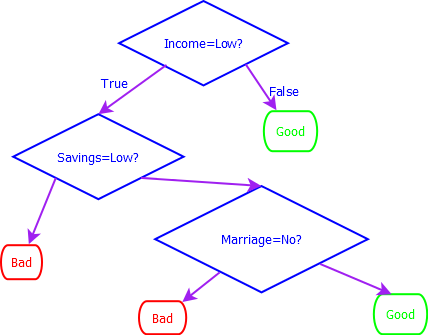

* The tree can be interpreted as `IF THEN` rules
    * IF income = low is false, THEN credit risk is good

### Pure leaf node  and diverse leaf node 
* A **pure leaf node** has records with same target class value
    * either 100% ”Good Risk” for records in the leaf node
    * Or 100% “Bad Risk” for records in the leaf node

* A **diverse leaf node** has records with different target class values 
    * including both “Good Risk” and “Bad Risk” records in the leaf node
    * for example, `[1,2]` represents the number of records `Bad`  =1 and the number of records `Good` =2 

### Leaf node may not always be pure
* Customers 7 and 11 have the same predictor values, but they have different risk outcomes   
    * “bad” with 1/2 confidence; “Good” with 1/2 confidence
* In this case, a leaf node cannot be pure

In [ ]:
df = pd.read_csv("../input/lecture7risk2/CreditRisk2.csv")  # read data
df.iloc[[7,11]] #use list to select multiple rows

### Decision Trees Requirements
* Decision Tree is **supervised learning** and training data must be labelled  
* Target variable must be **categorical**, such as `Good, Bad`
* Decision trees learn by instances, so training set should cover rich and varied instances
* If training set lacks data on some subset (for example, no data on `low income`), then classification on that subset (`low income`) will become problematic  


## Part 2 Case Study: Decision tree for credit risk classificatin with Python
### The decision tree created by Sklearn 
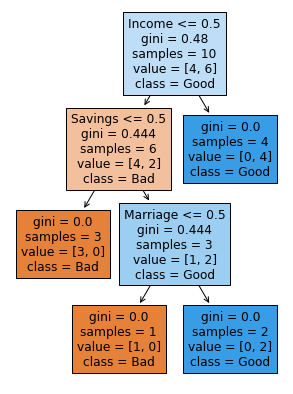
* Highest-level decision node is root node and tests whether record has `income = Low 0.5?`  
    * `<=0.5` because `low = 0` and `high=1` 
    * `samples =10`: the number of records
    * `value=[4,6]`: 4 `bad` records and 6 `good` records
    *  `Class = good`:  label from the label of majority of records  
* Records are split according to value of `income`. Records with `True` go to left branch, and with `False` go to right branch 
* Right branch reaches leaf node `Good` risk with Bad = 0 and  Good = 4
* Right branch reaches another decision node `Savings =Low 0.5?`
* Repeat the splitting. The tree grows until all nodes are leaf nodes or a predefined maximal depth is reaced


### Decision Tree Algorithm
1. Create a root node and assign all of the training data to it. 
2. Select the best splitting attribute.
3. Add a branch to the root node for each value of the split. Split the data into mutually exclusive subsets along the lines of the specific split.
4. Repeat the steps 2 and 3 for each and every leaf node until the stopping criteria is reached.


### Import library
* `Sklearn.Tree.DecisionTreeClassifier`: decision tree module for classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

### Data preparation
* Decision tree splitting is based on catogerical values of features 
    * such as whether `Savings` is `Low, Medium, High`
    * Numerical features are split into bins  `Savings` `low: <20K, Medium: [20K,40K),High: >=40K`
* But Sklearn does NOT support categorical variables
* Categorical features must be converted into numerical ones with Sklearn
* Ordinal features are encoded by `OrdinalEncoder`
    * `Savings, Income` have the order `'Low',  'High'`
    * Encode them one by one


In [ ]:
encoder = OrdinalEncoder(categories = [['Low', 'High']]) # create an encoder with order
df['Savings'] = encoder.fit_transform(df['Savings'].values.reshape(-1, 1)) # fit encoder  and transfer data with 'Savings'
df

In [ ]:
encoder = OrdinalEncoder(categories = [['Low', 'High']]) # create an encoder with order
df['Income'] = encoder.fit_transform(df['Income'].values.reshape(-1, 1)) # fit encoder  and transfer data with 'Savings'
df

* `'Marriage'` have the order `'No',  'Yes'`
* Encode `'No =0',  'Yes =1'`

In [ ]:
encoder = OrdinalEncoder(categories = [['No', 'Yes']]) # create an encoder with order
df['Marriage'] = encoder.fit_transform(df['Marriage'].values.reshape(-1, 1)) # fit encoder  and transfer data with 'Savings'
df

Split dataset in features and target variable 

In [ ]:
#split features and target variable
X = df.iloc[:,0:3]
y = df.iloc[:,3]

Split dataset into training set and test set
* first 10 records for training 
* last 2 records for test

In [ ]:
# Split dataset into training set and test set
X_train = X[0:10] # stop is excluded in slicing
X_test = X[10:]
y_train = y[0:10]
y_test = y[10:]

### Build a decision tree model
* Create `DecisionTreeClassifer` object
* Train `DecisionTreeClassifer`
  

We show the procedure of growing the tree step by step: `max_depth=1`

* Income is chosen as root node. Why Income? This will be explained in Part 3
* Left leaf node is not pure `value =[4,2]`. Need to be split

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',max_depth=1)
clf = clf.fit(X_train,y_train)
fig = plt.figure(figsize=(4,5))
_ = tree.plot_tree(clf, feature_names=df.columns,class_names=['Bad','Good'],filled=True)

depth = 2: `Saving` is chosen to split the data. Why Saving? This will be explained in Part 3

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',max_depth=2)
clf = clf.fit(X_train,y_train)
fig = plt.figure(figsize=(5,6))
_ = tree.plot_tree(clf, feature_names=df.columns,class_names=['Bad','Good'],filled=True)

depth = 3: all leaf nodes are pure

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',max_depth=3)
clf = clf.fit(X_train,y_train)
fig = plt.figure(figsize=(5,7))
_ = tree.plot_tree(clf, feature_names=df.columns,class_names=['Bad','Good'],filled=True)

### Evaluate model
* Compare predicted label `y_pred` and actutal label `y_test` on test data
* Only two test data. Pediction is wrong on Customer 11 
* 50% accuracy

In [ ]:
y_pred = clf.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

### Parameters in decision tree
`sklearn.tree.DecisionTreeClassifier` has several parameters

* `criterion` :  (default=`”gini`”). measure the quality of a split. 
    1. “gini” index
    2. “entropy” for information gain 
* `splitter` :  (default=`”best”`). Strategy used to choose the split at each node. 
    1. `“best”` to choose the best split
    2. `“random”` to choose the best random split.
* `max_depth` : (default=None): the maximum depth of the tree, e.g. =3

Note: for large data, the decision tree could be very large. Need to tune `max_depth`

### Decision tree design 
1. Splitting criteria
    * criterion='gini' or 'entropy'
2. Stopping criteria
    * When to stop building the tree such as `max_depth=3`

## Part 3 Manually build a decision tree step by step
### Main questions in building a decision tree
* How to select a feature as the root node?
* How to select a features as a decision node? 
    * Each branch should contain records with outcome value as pure  (same value) as possible.  
    * Need a measure of “pure” degree
* When to stop tree growing?
    * Set a maximal depth

### Decision trees 
There are different algorithms to grow a tree using different splitting criteria
1. Gini index determines the purity of a specific class as a result of a decision to branch along a particular attribute/value
    * Used in CART (classification and regression trees)
2. Information gain uses entropy to measure the extent of uncertainty or randomness of a particular attribute/value split
    * Used in ID3, C4.5, C5
3. Chi-square statistics
    * used in CHAID

### Classification and regression trees (CART)

* **Classification and regression trees** (CART or CRT) is implemented in Sklearn
* CRT adopts binary node splitting (two branches at each node)
* CRT uses Gini index for splitting
* **Gini index** is a metric, which is a concept from economics

|<img width  =800 src = "https://i.redd.it/3yzywl2pytc21.png">|
|:--:|
|[Gini Index World Map](https://i.redd.it/3yzywl2pytc21.png)|

* Measure the inequality of the income or wealth distribution in a nation's residents: the lower (greener), the more equal
* Measure the purity of a specific class: the lower, the purer, the better for splitting

### Gini Index

Assume that a data set $S$ contains records from $n$ classes, the **Gini index** is defined as
$$
Gini(S) =1-  p^2_1 -\cdots - p^2_n
$$
where $p_j$ is a relative frequency of class $j$ in $S$


If a data set $S$ is split into two subsets, $S_1$ and $S_2$, with sizes $N_1$ and $N_2$, respectively, the **Gini index** of the split set $S$ is defined as the weighted sum of Gini index oof the two subsets
$$
Gini_{split} =\frac{N_1}{N} Gini(S_1) +\frac{N_2}{N} Gini(S_2)
$$
where $N=N_1+N_2$ is the total numbers of records

### Example: data set

|     ID    |     Savings    |     Marriage    |     Income    |     Credit   Risk    |
|-----------|----------------|-----------------|---------------|----------------------|
|     1     |     Low        |     No          |     Low       |     Bad              |
|     2     |     High       |     Yes         |     Low       |     Good             |
|     3     |     Low        |     No          |     High      |     Good             |
|     4     |     Low        |     Yes         |     Low       |     Bad              |
|     5     |     Low        |     Yes         |     High      |     Good             |
|     6     |     High       |     No          |     Low       |     Bad              |
|     7     |     High       |     No          |     High      |     Good             |
|     8     |     High       |     Yes         |     Low       |     Good             |
|     9     |     Low        |     Yes         |     Low       |     Bad              |
|     10    |     High       |     Yes         |     High      |     Good             |


### Step 1: Determine Best Root Node (1)
* Start from `Savings` and crosstab betweeen `Savings` and `Risk`
* Calculate Gini index of “Saving”

|               |             |     Credit Risk    |            |     Number of instances    |
|---------------|-------------|--------------------|------------|----------------------------|
|               |             |     Good           |     Bad    |     10                     |
|     Saving    |     Low     |     2              |     3      |     5                      |
|               |     High    |     4              |     1      |     5                      |

$$Gini(Saving=low)=1−(\frac{2}{5})^2−(\frac{3}{5})^2 =0.48$$
$$Gini(Saving=high)=1−(\frac{4}{5})^2−(\frac{1}{5})^2=0.32$$
$$Gini(Saving)=(\frac{5}{10}) \times 0.48+\frac{5}{10} \times 0.32=0.40$$


### Step 1: Determine Best Root Node (2)
* Calculate Gini index of “Marriage”

|                 |            |     Credit Risk    |            |     Number of instances    |
|-----------------|------------|--------------------|------------|----------------------------|
|                 |            |     Good           |     Bad    |     10                     |
|     Marriage    |     Yes    |     4              |     2      |     6                      |
|                 |     No     |     2              |     2      |     4                      |


$$Gini(Marriage=Yes )=1-(\frac{4}{6})^2-(\frac{2}{6})^2=0.44$$
$$Gini(Marriage=No )=1-(\frac{2}{4})^2-(\frac{2}{4})^2= 0.5$$
$$Gini(Marriage)=\frac{6}{10} \times 0.44+\frac{4}{10} \times 0.5= 0.46$$


### Step 1: Determine Best Root Node (3)
* Calculate Gini index of “Income”

|               |             |     Credit Risk    |            |     Number of instances    |
|---------------|-------------|--------------------|------------|----------------------------|
|               |             |     Good           |     Bad    |     10                     |
|     Income    |     High    |     4              |     0      |     4                      |
|               |     Low     |     2              |     4      |     6                      |

$$Gini(Income=High)=1-(\frac{4}{4})^2-(\frac{0}{4})^2=0.0$$
$$Gini(Income=Low)=1-(\frac{2}{6})^2-(\frac{2}{6})^2= 0.44$$
$$Gini(Income)=\frac{4}{10} \times 0+\frac{6}{10} \times 0.44= 0.27	$$


### Step 1: Determine Best Root Node (4)
* Gini index values for attributes saving, marriage, and income
    1. Gini(Saving )=   0.4
    2. Gini(Marriage)= 0.46	 
    3. Gini(Income)= 0.27 

* Since Gini(Income)=0.27 is smallest, Income is taken as the root node. 


### Step 2: Split Tree

|     ID    |     Savings    |     Marriage    |     Income    |     Credit   Risk    |
|-----------|----------------|-----------------|---------------|----------------------|
|     3     |     Low        |     No          |     High      |     Good             |
|     5     |     Low        |     Yes         |     High      |     Good             |
|     7     |     High       |     No          |     High      |     Good             |
|     10    |     High       |     Yes         |     High      |     Good             ||

1. Branch for Income =High. 
    * No need for further splitting. Leaf node (Decision) is Good (pure)

|     ID    |     Savings    |     Marriage    |     Income    |     Credit   Risk    |
|-----------|----------------|-----------------|---------------|----------------------|
|     1     |     Low        |     No          |     Low       |     Bad              |
|     2     |     High       |     Yes         |     Low       |     Good             |
|     4     |     Low        |     Yes         |     Low       |     Bad              |
|     6     |     High       |     No          |     Low       |     Bad              |
|     8     |     High       |     Yes         |     Low       |     Good             |
|     9     |     Low        |     Yes         |     Low       |     Bad              |
  
2. Branch for Income = Low
    * Need for further splitting

### Step 3: Repeat to decide child node (1)
* Calculate Gini index of “Saving”. Crosstab between "Saving" and "Risk"
 
|               |             |     Credit Risk    |            |     Number of instances    |
|---------------|-------------|--------------------|------------|----------------------------|
|               |             |     Good           |     Bad    |     6                      |
|     Saving    |     Low     |     0              |     3      |     3                      |
|               |     High    |     2              |     1      |     3                      |


$$Gini (Saving = Low) =1-(\frac{0}{3})^2-(\frac{3}{3})^2=0$$
$$Gini (Saving = High) =1-(\frac{2}{3})^2-(\frac{1}{3})^2= 0.444$$
$$Gini (Saving) = \frac{3}{6} \times 0+ \frac{3}{6} \times 0.444=0.222  $$


### Step 3: Repeat to decide child node (2)
* Calculate Gini index of “Marriage”

|                 |            |     Credit Risk    |            |     Number of instances    |
|-----------------|------------|--------------------|------------|----------------------------|
|                 |            |     Good           |     Bad    |     6                      |
|     Marriage    |     Yes    |     2              |     2      |     4                      |
|                 |     No     |     0              |     2      |     2                      ||


$$ Gini (Marriage=Yes )= 1-(\frac{2}{4})^2-(\frac{2}{4})^2=0.5$$
$$Gini (Marriage=No)= 1-(\frac{0}{2})^2-(\frac{2}{2})^2= 0$$
$$Gini (Marriage)= \frac{4}{6} \times 0.5+ \frac{2}{6} \times 0=0.333   $$

### Step 3: Repeat to decide child node (3)
$$ Gini (Saving) = 0.222 $$
$$ Gini (Marriage)= 0.333 $$ 
Since Gini (Saving)  =0.222 is smallest, choose Saving as child node  


### Step 4. Repeat to Split Tree
|     ID    |     Savings    |     Marriage    |     Income    |     Credit   Risk    |
|-----------|----------------|-----------------|---------------|----------------------|
|     1     |     Low        |     No          |     Low       |     Bad              |
|     4     |     Low        |     Yes         |     Low       |     Bad              |
|     9     |     Low        |     Yes         |     Low       |     Bad              |

1. Branch for Income = Low and Saving= Low
    * Reach a pure leaf node: Decision = Bad for credit risk

|     ID    |     Savings    |     Marriage    |     Income    |     Credit   Risk    |
|-----------|----------------|-----------------|---------------|----------------------|
|     2     |     High       |     Yes         |     Low       |     Good             |
|     6     |     High       |     No          |     Low       |     Bad              |
|     8     |     High       |     Yes         |     Low       |     Good             |

2. Branch for Income = Low and Saving= High
    * Need further splitting


### Step 5: Split Tree
* Only “Marriage” is the remained attribute, so it will be taken as the child node without calculating Gini index.

|     ID    |     Savings    |     Marriage    |     Income    |     Credit   Risk    |
|-----------|----------------|-----------------|---------------|----------------------|
|     2     |     High       |     Yes         |     Low       |     Good             |
|     8     |     High       |     Yes         |     Low       |     Good             | 

* Branch Marriage =Yes $\to$ Credit Risk = Good

|     ID    |     Savings    |     Marriage    |     Income    |     Credit   Risk    |
|-----------|----------------|-----------------|---------------|----------------------|
|     6     |     High       |     No          |     Low       |     Bad              |

* Right branch Marriage = No $\to $ credit Risk = Bad 

### Step 6: Draw Decision Tree
* The tree is the same as that with Sklearn
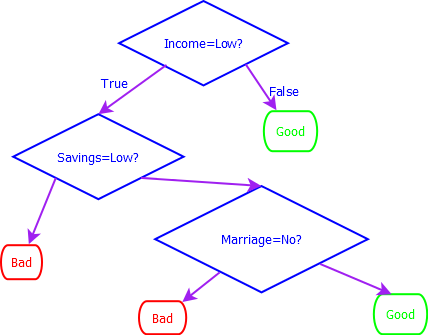

## Summary
* Decision tree is a supervised learning method for classification
* Sklearn provide high-level library for decision tree. Users don’t need to consider low-level implementation of decision tree algorithms
* CART is a popular decision tree algorithm using gini index for splitting tree. Sklearn implement CART
* Decision Trees produce interpretable output in IF THEN rules

